In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv'
df = pd.read_csv(url)

## Step 1 : EDA

### RAW data -> Visualize all below:
 1. find numerical features -> pairplot, barplot
 2. find categorical features -> barchart, piechart
 3. find missing values ->sns.heatmap
 4. find outliers -> boxplot

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#Cleaning the data by removing irrelevant columns
df=df.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [5]:
# find numerical features
num_features = df.select_dtypes(include=['number']).columns
num_features

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
# find categorical features
cat_features = df.select_dtypes(include=['object']).columns
cat_features

Index(['Sex', 'Embarked'], dtype='object')

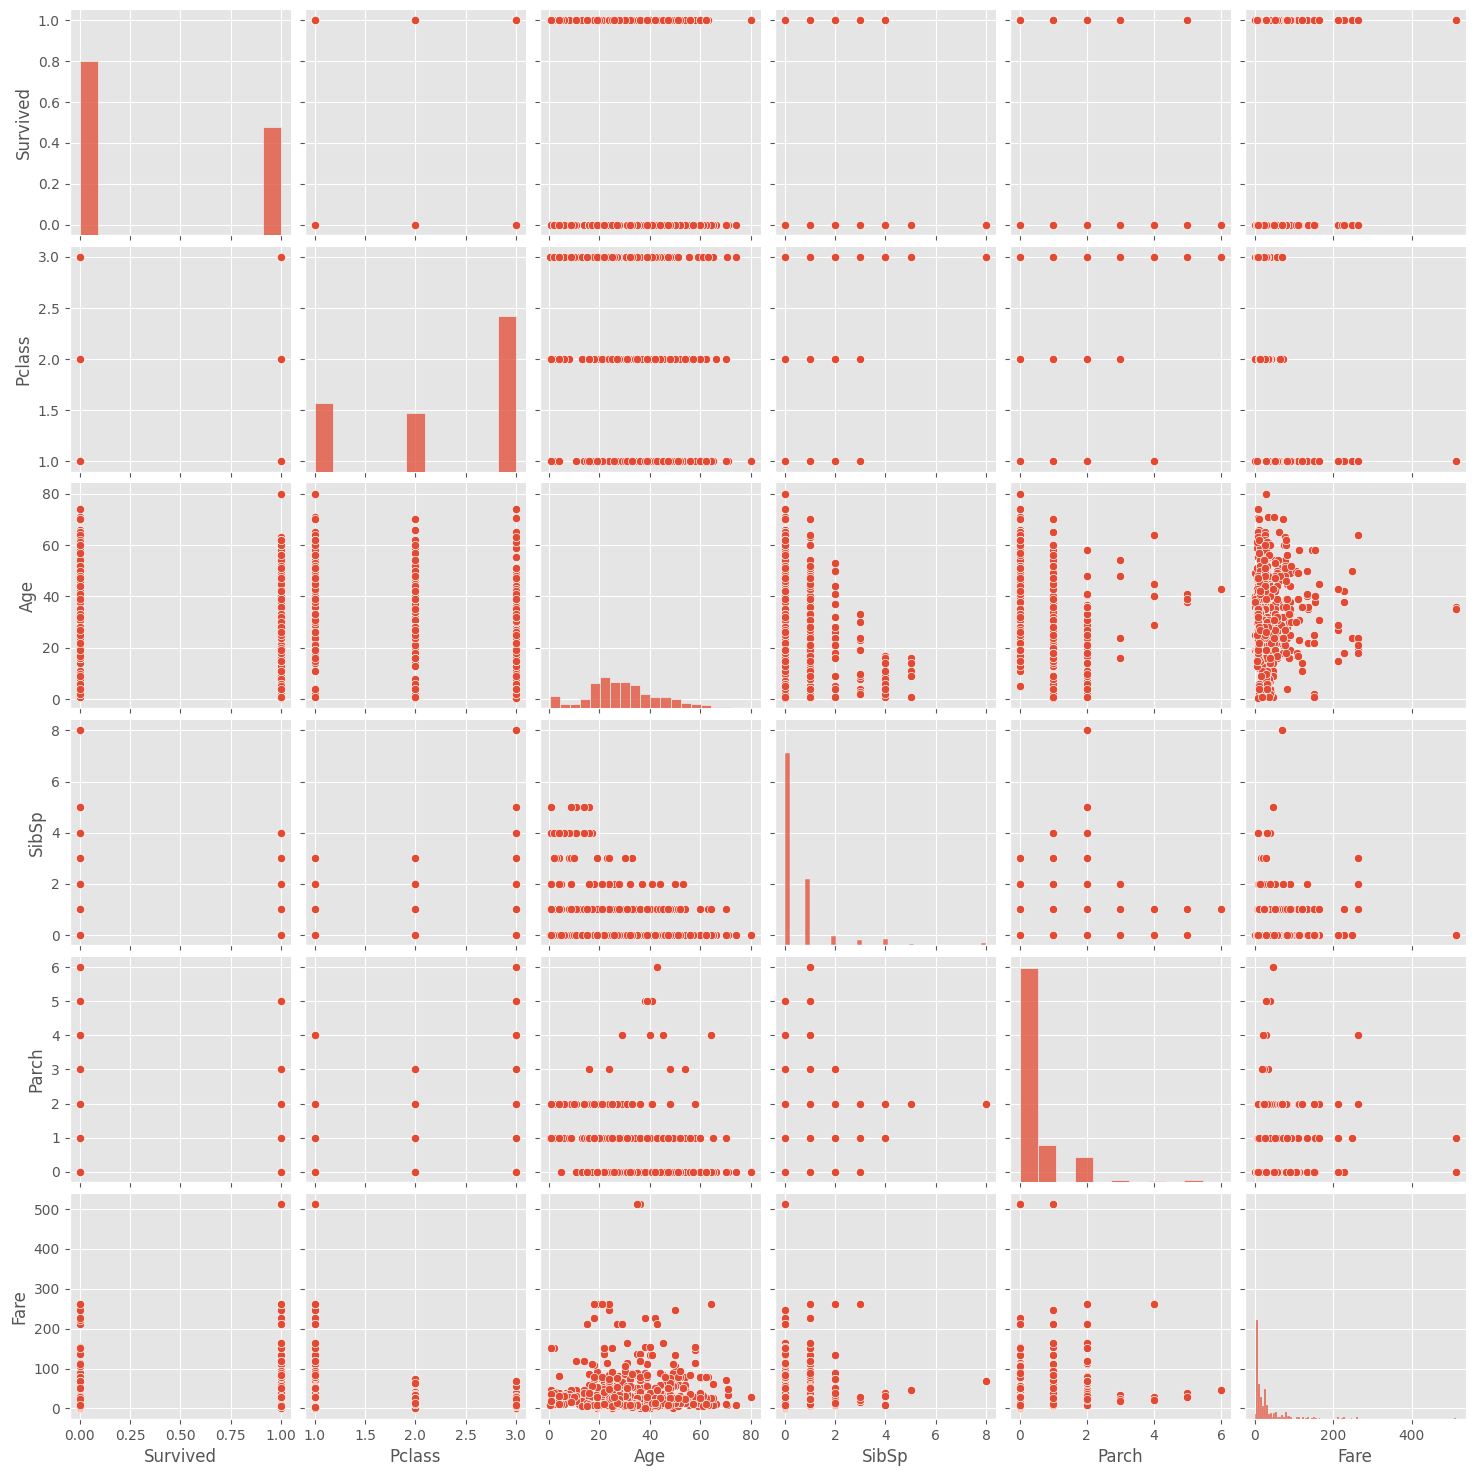

In [7]:
# creating pairplot
sns.pairplot(df[num_features])
plt.show()

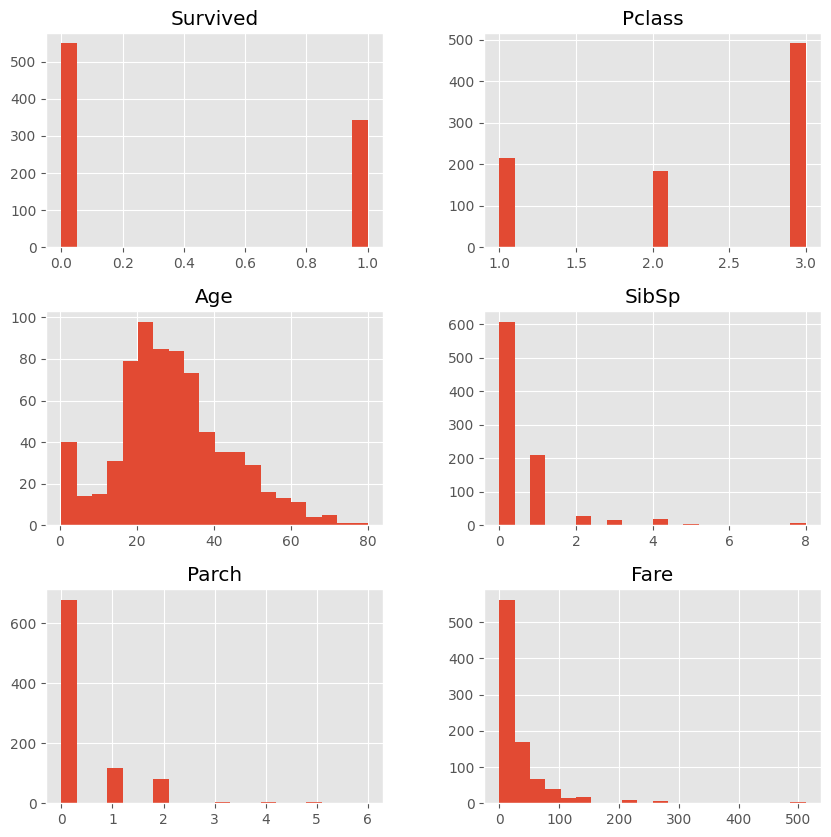

In [8]:
# Create histograms for each numerical column 
df[num_features].hist(figsize=(10, 10), bins=20)
plt.show()

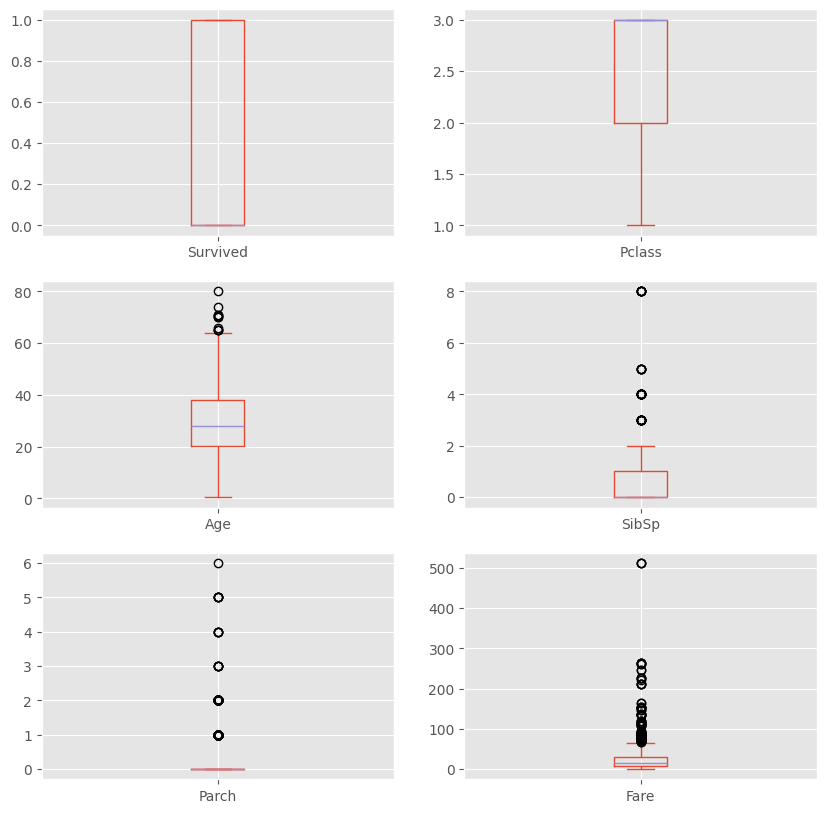

In [9]:
# Create box plots for each numerical column 
df[num_features].plot(kind='box', subplots=True, layout=(len(num_features) // 2, 2), figsize=(10, 10), sharex=False, sharey=False)
plt.show()

In [10]:
cat_features

Index(['Sex', 'Embarked'], dtype='object')

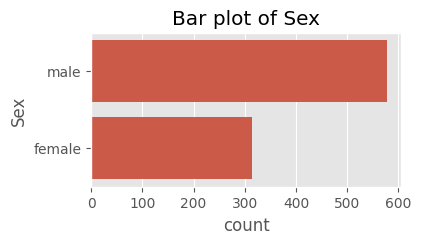

In [11]:
plt.figure(figsize=(4,2))
sns.countplot(y=df['Sex'],data=df)
plt.title('Bar plot of Sex')
plt.show()

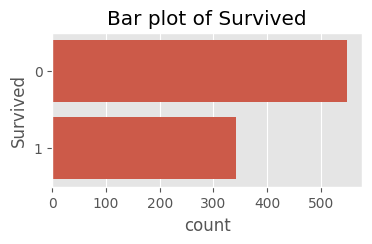

In [12]:
plt.figure(figsize=(4,2))
sns.countplot(y=df['Survived'],data=df)
plt.title('Bar plot of Survived')
plt.show()

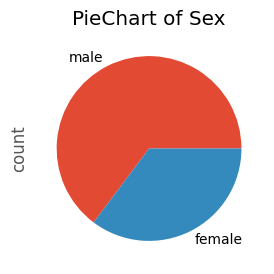

In [13]:
plt.figure(figsize=(3,3))
df['Sex'].value_counts().plot.pie()
plt.title('PieChart of Sex')
plt.show()

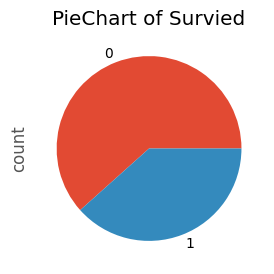

In [14]:
plt.figure(figsize=(3,3))
df['Survived'].value_counts().plot.pie()
plt.title('PieChart of Survied')
plt.show()

In [ ]:
#missing values
missing_val = df.isnull().sum()
missing_val.sort_values(ascending=False)

Age         177
Embarked      2
Pclass        0
Survived      0
Sex           0
SibSp         0
Parch         0
Fare          0
dtype: int64

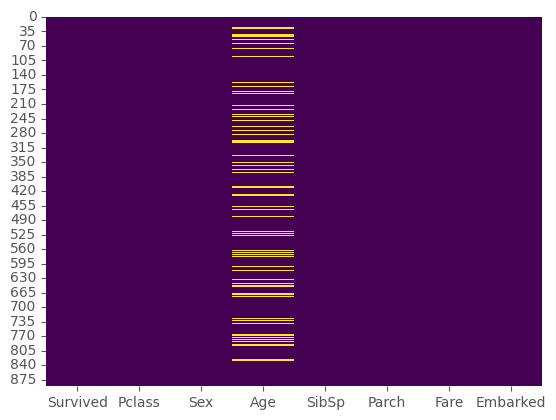

In [ ]:
# visualizing null vlaues
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')
plt.show()

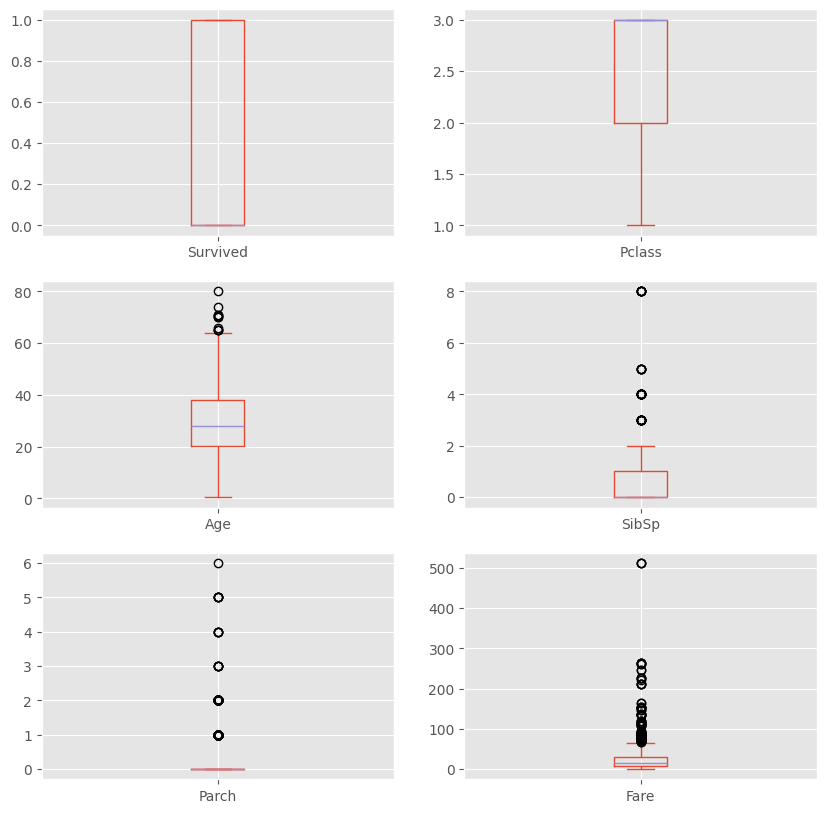

In [17]:
# finding outliers
df.plot(kind='box', subplots=True, layout=(len(num_features) // 2, 2), figsize=(10, 10), sharex=False, sharey=False)
plt.show()

## Step 2 : HANDLING MISSING VALUES

 1. Mean
 2. Median
 3. Mode

In [18]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
# Age, Embarked
# find mean median and mode of Age and Embarked
mean_age = df['Age'].mean()
median_age = df['Age'].median()
mode_age = df['Age'].mode()[0]
print(f'Mean of Age: {mean_age}')
print(f'Median of Age: {median_age}')
print(f'Mode of Age: {mode_age}')

# mean_Embarked = df['Embarked'].mean()
# median_Embarked = df['Embarked'].median()
# mode_Embarked = df['Embarked'].mode()[0]
# print(f'Mean of Embarked: {mean_Embarked}')
# print(f'Median of Embarked: {median_Embarked}')
# print(f'Mode of Embarked: {mode_Embarked}')

Mean of Age: 29.69911764705882
Median of Age: 28.0
Mode of Age: 24.0


<Axes: ylabel='Density'>

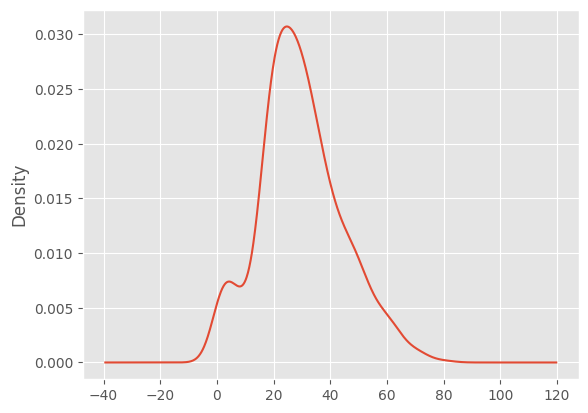

In [20]:
df['Age'].plot(kind='kde')

<Axes: ylabel='Density'>

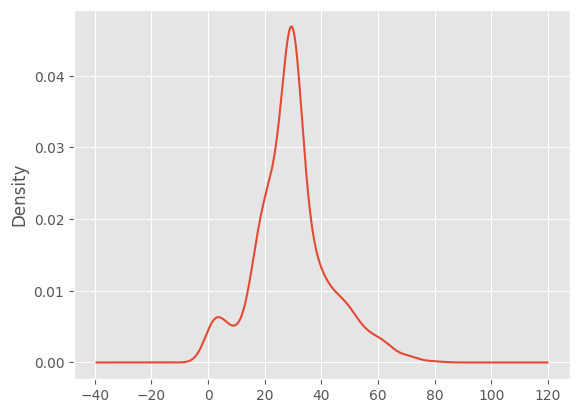

In [21]:
df['Age'].fillna(mean_age,inplace=True)
df['Age'].plot(kind='kde')

In [22]:
#check missing values
missing_val = df.isnull().sum()
missing_val.sort_values(ascending=False)

Embarked    2
Survived    0
Sex         0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

## Step 6 : Converting Categrical into numerical

In [23]:
df.Sex=df.Sex.map({'female':0, 'male':1})
df.Embarked=df.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})

In [24]:
mode_emb = df.Embarked.mode()[0]
mode_emb

0

In [25]:
df['Embarked'].fillna(mode_emb,inplace=True) # filling 2 missing values with mode

C:\Users\GANESH\AppData\Local\Temp\ipykernel_18664\1703399788.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(mode_emb,inplace=True) # filling 2 missing values with mode
C:\Users\GANESH\AppData\Local\Temp\ipykernel_18664\1703399788.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

## Step 3 : HANDLING imbalanced dataset

In [26]:
y = df.Survived
y.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64

<Axes: xlabel='Survived', ylabel='count'>

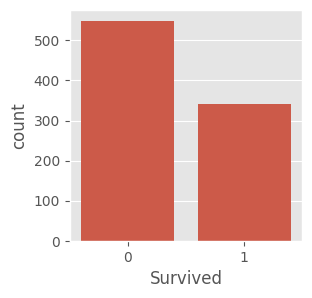

In [27]:
plt.figure(figsize=(3,3))
sns.countplot(x=y,data=df)

## Step 4 : Treating Outliers

## Step 5 : SCALING data
-> Standardization, Normalization

In [28]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.361392
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.635673
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [30]:
cols = ['Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

df[cols] = scaler.fit_transform(df[cols])

In [31]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,0.367921,0.065376,0.063599,0.062858,0.180696
std,0.486592,0.836071,0.477990,0.163383,0.137843,0.134343,0.096995,0.317837
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.271174,0.000000,0.000000,0.015440,0.000000
50%,0.000000,3.000000,1.000000,0.367921,0.000000,0.000000,0.028213,0.000000
75%,1.000000,3.000000,1.000000,0.434531,0.125000,0.000000,0.060508,0.500000
max,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Apply Models

In [32]:
from sklearn.model_selection import train_test_split
X = df.drop('Survived', axis=1)
y = df.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=73)

In [33]:
X_train.shape, y_train.shape

((668, 7), (668,))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score
from sklearn.tree import DecisionTreeClassifier
#regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,root_mean_squared_error
from sklearn.tree import DecisionTreeRegressor

rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
svc = SVC()
lr = LogisticRegression()

In [35]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print("RF accuracy: ", accuracy_score(y_test, y_pred))

RF accuracy:  0.8565022421524664


In [36]:
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
print("RF accuracy: ", accuracy_score(y_test, y_pred))

RF accuracy:  0.8116591928251121


In [37]:
gb.fit(X_train,y_train)
y_pred = gb.predict(X_test)
print("RF accuracy: ", accuracy_score(y_test, y_pred))

RF accuracy:  0.8565022421524664


In [38]:
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
print("RF accuracy: ", accuracy_score(y_test, y_pred))

RF accuracy:  0.820627802690583


In [ ]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(estimator=rf,param_grid=params, cv=5, verbose=2, n_jobs=-1)

search.fit(X_train,y_train)
search.best_params_
search.best_score_

In [ ]:
params = {
    'n_estimators':[20,60,100,120],
    'max_samples':[0.5,0.75,1.0],
    'bootstrap':[True, False],
    'max_features':[0.2,0.6,1.0],
    'max_depth':[2,8,None]
}

In [ ]:
print(search.best_params_)
print(search.best_score_)